In [0]:
import numpy as np
import matplotlib.pyplot as plt

def newton(x,val_x,val_y):
  coeficientes = np.zeros(val_x.shape[0])
  m_val=np.zeros((val_x.shape[0],val_x.shape[0]),dtype=float)
  m_controle=np.zeros((val_x.shape[0],val_x.shape[0]),dtype=bool)
  res=0;
  diferenca=1;
  for i in range (coeficientes.shape[0]):
    coeficientes[i]=pd(0,i,m_val,m_controle,val_x,val_y)
    res+=diferenca*coeficientes[i]
    diferenca*=x-val_x[i]
  #print('Valores dos coeficientes = ',coeficientes);
  #print('f(',x,') = ', res,sep='')
  return res;

def pd(inicio,fim,m_val,m_controle,val_x,val_y):
  if m_controle[inicio,fim]:
    return m_val[inicio,fim] #se ja tiver sido calculado, retorna o valor referente
  if(inicio==fim):
    return val_y[inicio] #quando chegar num caso base, retornar o valor de f(x)
  #caso nao seja um caso base, fazer a pd de acordo com a formula de calculo das diferenças divididas
  #f[xi,xi+1,xi+2,...,xi+k-1,xi+k]= (f[xi,xi+1,xi+2,...,xi+k-1,xi+k]-f[xi,xi+1,xi+2,...xi+k-2,,xi+k-1])/(xi+k)-xi
  #o nome pd é devido à tecnica utilizada
  m_val[inicio,fim]=(pd(inicio+1,fim,m_val,m_controle,val_x,val_y)-pd(inicio,fim-1,m_val,m_controle,val_x,val_y))/(val_x[fim]-val_x[inicio])
  m_controle[inicio,fim]=1
  return m_val[inicio,fim];


def lagrange(x,val_x,val_y):
  for i in range(val_x.shape[0]):
    if val_x[i]==x:
      return val_y[i]
  
  g=np.zeros((val_x.shape[0],val_x.shape[0])) #matriz G para metodo de lagrange utilizando dispositivo pratico
  gd=1 #produto da diagonal principal
  l=val_y.copy();

  #for para construir a matriz; onde i=j o valor é x-val_x[coluna]; onde i!=j, val_x[linha]-val_x[coluna]
  for i in range(g.shape[0]): 
    for j in range(g.shape[0]): 
      if i!=j:
        g[i,j]=val_x[i]-val_x[j]
      else:
        g[i,j]=x-val_x[j]
        gd*=g[i,j] #atualiza o produto da diagonal principal
  res=0;
  for i in range(g.shape[0]):
    l[i]=gd/np.prod(g[i,:]) #Cada Li(x) recebe o quociente entre o produto da diagonal principal e o produto da respectiva linha i.
    res+=l[i]*val_y[i] #o resultado é a soma de cada Li(x) com o respectivo val_y[x](ou valor de f(xi))

  #print('f(',x,') = ',res)
  #print('Coeficientes = ', l)
  return res



def pivotamento(matriz):
  for i in range(matriz.shape[0]):
    maior_abs=np.abs(matriz[i,i])
    maior=matriz[i,i]
    for q in range(i+1,matriz.shape[0]): 
      if(np.abs(matriz[q,i])>maior_abs): 
        maior=matriz[q,i] 
        matriz[[i,q]]=matriz[[q,i]] 
    pivo=maior 
    equacao_pivo=matriz[i,:] 
    j=i+1 
    while(j<matriz.shape[0]): 
      eliminador=matriz[j,i]/pivo 
      matriz[j,:]=matriz[j,:]-(eliminador*equacao_pivo) 
      j=j+1 
  return matriz 

def substituicao(matriz):
  solucoes=np.zeros(matriz.shape[0],dtype=float) 
  solucoes[-1]=matriz[-1,-1]/matriz[-1,-2] 
  soma=0
  for i in range(-(matriz.shape[0]-2),1): 
    for j in range(matriz.shape[0]): 
      if(j!=-i): 
        soma+=solucoes[j]*matriz[-i,j] 
    solucoes[-i]=(matriz[-i,-1]-soma)/matriz[-i,-i] 
    soma=0 
  return solucoes 

def gauss_pivotamento(matriz_sistema):
  return substituicao(pivotamento(matriz_sistema))

def direto(x,val_x,val_y):
  m=np.zeros((val_x.shape[0],val_x.shape[0]+1)) #preenche-se uma matriz de zeros
  m[:,-1]=val_y.copy()#ultima coluna recebe os valores de y
  for i in range(val_x.shape[0]):
    for j in range(val_x.shape[0]):
      m[i,j]=val_x[i]**j #x^n+x^n-1+x^n-2+...+x^2+x+0 = y
  coeficientes=gauss_pivotamento(m) #resolvo o sistema
  res=0
  for k in range(len(coeficientes)):
    res+=coeficientes[k]*x**k
  #print('Coeficientes = ', coeficientes)
  #print('f(',x,') = ', res,sep='')
  return res


def rafael_matriz_splines(val_x,val_y):
  matriz=np.zeros((3*(val_x.shape[0]-1),3*(val_x.shape[0]-1)+1)) #numero de linhas e colunas da matriz
  num_pol=val_x.shape[0]-1 #numero de polinomios para n pontos é n-1.

  for i in range(matriz.shape[0]):
    if i<2*num_pol: #até a linha equivalente a 2 vezes o numero de polinomios, a ultima coluna recebe os valores de f(x)
      ind=i//2 #padrão para colocar os indices do vetor dos dos valores de x.
      if i%2:
        #se a linha for impar
        matriz[i,ind]=val_x[ind+1]**2
        matriz[i,ind+num_pol]=val_x[ind+1]
        matriz[i,ind+2*num_pol]=1
      else:
        #se for par
        matriz[i,ind]=val_x[ind]**2
        matriz[i,ind+num_pol]=val_x[ind]
        matriz[i,ind+2*num_pol]=1
      matriz[i,-1]=val_y[(1+i)//2] #colocando os valores de f(x)
    elif i<(matriz.shape[0]-1):
      #preenchendo as condições das derivadas
      matriz[i,i-2*num_pol]=2*val_x[i+1-2*num_pol]
      matriz[i,i+1-2*num_pol]=-2*val_x[i+1-2*num_pol]
      matriz[i,i-num_pol]=1
      matriz[i,i+1-num_pol]=-1
    else:
      #a1=0
      matriz[i,0]=1
  return matriz;


#ms = matriz spline preenchida
def solucao_sistema(ms):
  a=ms[:,:-1].copy(); #separa a matriz dos coeficientes
  b=ms[:,-1].copy(); #matriz dos valores
  return np.linalg.solve(a,b)


#ssms = solução sistema matriz splines
#val_x = valores de x da tabela
#x = ponto intermediario que deseja encontrar f(x)

def polinomio_splines(x,val_x,ssms):
  k=val_x.shape[0]-1 #k é o numero de polinomios splines
  for j in range (k):
    if x<=val_x[j+1]: #se x está dentro do intervalo
      return ssms[j]*x**2+ssms[j+k]*x+ssms[j+k*2] #retorna o valor splines de x, da forma ax^2+bx+c

def splines(x,val_x,val_y):
  k=rafael_matriz_splines(val_x,val_y)
  k1=solucao_sistema(k)
  k2=polinomio_splines(x,val_x,k1)
  #print('f(',x,') = ',k2,sep='')
  return k2;


def calcular_erro(x1,x2):
  return np.abs((x1-x2)/x1)*100

1. Termistores são sensores usados para medir temperatura. Os termistores são baseados em materiais que mudam a resistência elétrica de acordo com a temperatura. Para medir a temperatura, os fabricantes fornecem uma curva de temperatura $\times$ resistência. Um fabricante fez uma série de observações e obteve a seguinte tabela: 

| R(ohm) | T(ºC) |
|--------|--------|
|1101.0|25.113
| 911.3  | 30.131 |
| 636.0  | 40.120 |
| 451.1  | 50.128 |

Determine a temperatura correspondente a 754.8 ohms:

  a. Utilizando um polinômio de primeira ordem
  
  b. Utilizando um polinômio de segunda ordem
  
  c. Utilizando um polinômio com o maior grau possível.
  
  Compare os resultados utilizando o erro de aproximação $\epsilon_a$

In [0]:
k=754.8

x1=np.array([636.0,911.3],dtype=float)
y1=np.array([40.120,30.131],dtype=float)
a=newton(k,x1,y1)
print('a=',a,sep='')

x2=np.array([636.0,911.3,1101.0],dtype=float)
y2=np.array([40.120,30.131,25.113],dtype=float)
b=newton(k,x2,y2)
print('b=',b,sep='')

x3=np.array([451.1,636.0,911.3,1101.0,],dtype=float)
y3=np.array([50.28,40.120,30.131,25.113],dtype=float)
c=newton(k,x3,y3)
print('c=',c,sep='')

print('erro a e b = ',calcular_erro(a,b),'%')
print('erro a e c = ',calcular_erro(a,c),'%')
print('erro b e c = ',calcular_erro(b,c),'%')

a=35.809454413367234
b=35.416348906616534
c=35.22407293620666
erro a e b =  1.0977701648645024 %
erro a e c =  1.6347120802322483 %
erro b e c =  0.5429017285685044 %


2. Um braço robótico faz a checagem de qualidade de pontos de solda em um carro. A posição de algumas soldas é dada na tabela abaixo 

| x(cm) | y(cm) |
|--------|--------|
|2.00|7.2
| 4.25  | 7.1 |
| 5.25  | 6.0 |
| 7.81  | 5.0 |
| 9.20  | 3.5 |
|10.60| 5.0 |

Encontre o valor de $y$ para $x = 4.00$

a. Utilizando um polinômio de primeira ordem
  
  b. Utilizando um polinômio de segunda ordem
  
  c. Utilizando um polinômio com o maior grau possível.
  
   Compare os resultados utilizando o erro de aproximação $\epsilon_a$

In [0]:
k=4.0
x1=np.array([2.0,4.25],dtype=float)
y1=np.array([7.2,7.1],dtype=float)
a=newton(k,x1,y1)
print('a=',a,sep='')

x2=np.array([2.0,4.25,5.25],dtype=float)
y2=np.array([7.2,7.1,6.0],dtype=float)
b=newton(k,x2,y2)
print('b=',b,sep='')

x3=np.array([2.0,4.25,5.25,7.81,9.2,10.6],dtype=float)
y3=np.array([7.2,7.1,6.0,5.0,3.5,5.0],dtype=float)
c=newton(k,x3,y3)
print('c=',c,sep='')

print('erro a e b = ',calcular_erro(a,b),'%')
print('erro a e c = ',calcular_erro(a,c),'%')
print('erro b e c = ',calcular_erro(b,c),'%')

a=7.111111111111111
b=7.273504273504273
c=7.474965971018131
erro a e b =  2.2836538461538507 %
erro a e c =  5.116708967442471 %
erro b e c =  2.7698024217533868 %


3. A temperatura de um lago foi medida de acordo com a sua profundidade. Os valores obtidos são apresentados na tabela abaixo:

| Temperatura, T (°C) | Profundidade,  z (m) |
|--------|--------|
| 19.1 | 0 |
| 19.1 | -1|
|19.0 | -2 |
|18.8 | -3 |
|18.7 | -4 |
|18.3 | -5 |
|18.2 | -6 |
| 17.6| -7 |
|11.7 | -8 |
|  9.9 | -9  |
|  9.1| -10 |

Determine a temperatura em z = -7.5.

a. Utilizando um polinômio de primeira ordem
  
  b. Utilizando um polinômio de segunda ordem
  
  c. Utilizando um polinômio com o maior grau possível.
  
   Compare os resultados utilizando o erro de aproximação $\epsilon_a$

In [0]:
k=-7.5
x1=np.array([-7.0,-8.0],dtype=float)
y1=np.array([17.6,11.7],dtype=float)
a=newton(k,x1,y1)
print('a=',a,sep='')

x2=np.array([-7.0,-8.0,-9.0],dtype=float)
y2=np.array([17.6,11.7,9.9],dtype=float)
b=newton(k,x2,y2)
print('b=',b,sep='')

x3=np.array([0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10],dtype=float)
y3=np.array([19.1,19.1,19.0,18.8,18.7,18.3,18.2,17.6,11.7,9.9,9.1],dtype=float)
c=newton(k,x3,y3)
print('c=',c,sep='')

print('erro a e b = ',calcular_erro(a,b),'%')
print('erro a e c = ',calcular_erro(a,c),'%')
print('erro b e c = ',calcular_erro(b,c),'%')

a=14.65
b=14.1375
c=15.391317367553714
erro a e b =  3.4982935153583687 %
erro a e c =  5.06018680924037 %
erro b e c =  8.86873469534016 %


4. Um pára-quedista realizou seis saltos, saltando de alturas distintas em cada salto. Foi testada a precisão de seus saltos em relação a um alvo de raio de 5m, de acordo com a altura. A distância apresentada na tabela abaixo é relativa a circunferência.

Altura (m) | Distância do Alvo (m)
----------|--------------
1500| 35
1250 | 25
1000 | 15
750 | 10
500 | 7

Levando em consideração os dados acima, a que provável distância do alvo cairia o páraquedista se ele saltasse de uma altura de 900m?


In [0]:
q=900.0
h=np.array([1500,1250,1000,750,500],dtype=float)
d=np.array([35.0,25,15,10,7],dtype=float)
a=newton(q,h,d)
b=lagrange(q,h,d)
c=direto(q,h,d)
d=splines(q,h,d)

print(a,'m')
print(b,'m')
print(c,'m')
print(d,'m')
#proximo aos primeiros valores, splines oscilou
#o paraquedista deve ter se machucado

12.388800000000002 m
12.388799999999998 m
12.388800000000117 m
11.000000000000014 m


5. Durante três dias consecutivos foi tomada a temperatura (em °C) numa região de uma cidade, por quatro vezes no período das 6 às 12 horas. Determine, usando todos os dados da tabela abaixo, a média das temperaturas dos três dias às 9 horas.


Hora|Dia 1| Dia 2|Dia 3
-----|---|---|----
6  | 18 | 17 | 18
8  | 20 | 20 | 21
10 | 24 | 25 | 22
12 | 28 | 27 | 23


In [0]:
v=9.0
h=np.array([6,8,10,12],dtype=float)
d1=np.array([18,20,24,28],dtype=float)
d2=np.array([17,20,25,27],dtype=float)
d3=np.array([18,21,22,23],dtype=float)

a1=lagrange(v,h,d1)
a2=lagrange(v,h,d2)
a3=lagrange(v,h,d3)
medias=np.array([a1,a2,a3])
print('a1=',a1)
print('a2=',a2)
print('a3=',a3)
res=np.mean(medias)
print('media = ',res,'ºC',sep='')

a1= 21.875
a2= 22.5625
a3= 21.625
media = 22.020833333333332ºC


6. Na tabela abaixo está assinalado o número de habitantes de Belo Horizonte nos censos de 1950, 1960, 1970 e 1980. Crie um script no qual seja possível estimar a população da cidade em qualquer ano do intervalo dado.

Ano|1950|1960|1970|1980
---|-|-|-|-|
Habitantes| 352.724 | 683.908 | 1.235.030 | 1.814.990

In [0]:
a=np.array([1950,1960,1970,1980],dtype=float)
p=np.array([352724,683908,1235030,1814990], dtype=float)

ano=int(input())
print('A População estimada para o ano',ano,'é de:',newton(ano,a,p))

1969
A População estimada para o ano 1969 é de: 1175466.94


7. Um automóvel percorreu 160 km numa rodovia que liga duas cidades e gastou, neste trajeto, 2 horas e 20 minutos. A tabela abaixo dá o tempo gasto e a distância percorrida em alguns pontos entre as duas cidades.

Tempo (min) | Distância (km)
--|--
0|0
10|8
30|27
60|58
90|100
120|145
140|160

Determine:

a) Qual foi aproximadamente à distância percorrida pelo automóvel nos primeiros 45 minutos de viagem, considerando apenas os quatro primeiros pontos da tabela?

b) Quantos minutos o automóvel gastou para chegar à metade do caminho?

In [0]:
j=45
time=np.array([0,10,30,60.0],dtype=float)
dist=np.array([0,8,27.0,58.0],dtype=float)
a=direto(j,time,dist)
print('a=',a)

time2=np.array([0,10,30.0,60.0,90,120,140],dtype=float)
dist2=np.array([0,8,27,58.0,100.0,145.0,160.0],dtype=float)
j=80
b=direto(j,dist2,time2)
print('b=',b)

a= 42.56250000000001
b= 77.83549880117197


8. Construa a tabela de log(x), usando 6 pontos igualmente espaçados, de tal forma que $x_0$ = 2 e $x_5$=3. Determine o valor aproximado de x tal que log(x) = 0.45.

In [0]:
x1=np.array([2.0,2.2,2.4,2.6,2.8,3.0],dtype=float)
logx=np.zeros(6,dtype=float)
for i in range(6):
  logx[i]=np.log10(x1[i])
print('  x  |      logx')
print('---------------------------')
for k in range(x1.shape[0]):
  print(x1[k],' | ',logx[k])

r=newton(.45,logx,x1)
print('---------------------------\n')
print('o valor de x é x =',r)
print('conferindo --> log10(2.818382932842931) = ',np.log10(r))

  x  |      logx
---------------------------
2.0  |  0.3010299956639812
2.2  |  0.3424226808222063
2.4  |  0.38021124171160603
2.6  |  0.414973347970818
2.8  |  0.4471580313422192
3.0  |  0.47712125471966244
---------------------------

o valor de x é x = 2.818382932842931
conferindo --> log10(2.818382932842931) =  0.45000000024323306


9. Um veículo de fabricação nacional, após vários testes, apresentou os resultados a seguir, quando se analisou o consumo de combustível de acordo com a velocidade média imposta ao veículo. Os testes foram realizados em rodovia em operação normal de tráfego, numa distância de 76 km.

Velocidade (km/h) | Consumo (km/l)
-|-
55|14.08
70|13.56
85|13.28
100|12.27
120|11.30
140|10.40

a. Verifique o consumo aproximado para o caso de uma velocidade média de 80 km/h.

b. Estime a velocidade média para se obter um consumo de 12 km/l.

In [0]:
vm=80
consumo=12
v1=np.array([55,70,85,100,120,140],dtype=float)
c1=np.array([14.08,13.56,13.28,12.27,11.30,10.40])

a=newton(vm,v1,c1)
b=lagrange(consumo,c1,v1)
print('a =',a)
print('b =',b)

a = 13.466713134360193
b = 99.67682942648364


10. A tabela abaixo fornece a demanda máxima diária de energia elétrica em uma cidade

Dia | Pico Demanda (Mw)
-----|---------
01/jan|10.5
10/jan|15
01/fev|20.5
15/fev|13

a. Utilizando interpolação polinomial determine o pico máximo para o dia 05 de fevereiro.

In [0]:
#dias contados a partir de 1/jan
dia=36
dias=np.array([1,10,32,46],dtype=int)
pico=np.array([10.5,15,20.5,13.0],dtype=float)

#calculando utilizando os 4 métodos
a1=newton(dia,dias,pico)
a2=lagrange(dia,dias,pico)
a3=direto(dia,dias,pico)
a4=splines(dia,dias,pico)

a=np.array([a1,a2,a3,a4])
for i in range(4):
  print('a',i+1,'=',a[i],sep='')



a1=19.548187972919155
a2=19.54818797291916
a3=19.548187972919152
a4=19.887755102040813


11. A população em milhões dos Estados Unidos de 1920 a 2000 pode ser tabulada como

Data|População
-------|------
1920|106,46
1930|123,08
1940|132,12
1950|152,27
1960|180,67
1970|205,05
1980|227,23
1990|249,46
2000|281,42

a. Crie um script para estimar com a melhor precisão possível a população dos Estados Unidos em qualquer ano dentro do intervalo fornecido.

b. Ajuste um polinômio de sétimo grau aos 8 primeiros pontos (1920 a 1990). Use-o para calcular a população em 2000 por extrapolação e compare sua previsão com o resultado real. Trace um gráfico com os pontos dados e o seu polinômio interpolador entre 1990 e 2000

In [0]:
#A
ano=np.array([1920,1930,1940,1950,1960,1970,1980,1990,2000],dtype=float)
pop=np.array([106.46,123.08,132.12,152.27,180.67,205.05,227.23,249.46,281.42], dtype=float)
w=int(input())
metodos=['newton','lagrange','direto','splines'];
#p1=0.0
for i in range(4):
  if i==0:
    p1=newton(w,ano,pop)
  elif i==1:
    p1=lagrange(w,ano,pop)
  elif i==2:
    p1=direto(w,ano,pop)
  else:
    p1=splines(w,ano,pop)
  print('Populacao estimada para o ano',w,'utilizando o metodo',metodos[i],'é:',p1)


1969
Populacao estimada para o ano 1969 utilizando o metodo newton é: 202.83376111666846
Populacao estimada para o ano 1969 utilizando o metodo lagrange é: 202.83376111666843
Populacao estimada para o ano 1969 utilizando o metodo direto é: 205.625
Populacao estimada para o ano 1969 utilizando o metodo splines é: 202.0341999999655


calculo da população para o ano 2000: 175.08000000000226 

coeficientes do polinomio --> do grau 7 ao 0: [ 1.06460000e+02  1.66200000e+00 -3.79000000e-02  3.11500000e-03
 -8.97916667e-05  1.01166667e-06  1.57777778e-08 -9.62698413e-10] 

erro da previsão comparado com o valor real 37.786937673227825 %


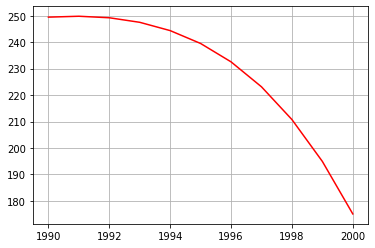

In [0]:
#B
ano11=np.array([1920,1930,1940,1950,1960,1970,1980,1990],dtype=float)
pop11=np.array([106.46,123.08,132.12,152.27,180.67,205.05,227.23,249.46], dtype=float)
def newtonq11(x,val_x,val_y):
  coeficientes = np.zeros(val_x.shape[0])
  m_val=np.zeros((val_x.shape[0],val_x.shape[0]),dtype=float)
  m_controle=np.zeros((val_x.shape[0],val_x.shape[0]),dtype=bool)
  res=0;
  diferenca=1;
  for i in range (coeficientes.shape[0]):
    coeficientes[i]=pd(0,i,m_val,m_controle,val_x,val_y)
    res+=diferenca*coeficientes[i]
    diferenca*=x-val_x[i]
  #print('Valores dos coeficientes = ',coeficientes);
  #print('f(',x,') = ', res,sep='')
  return res,coeficientes

a11=2000
real=281.42
r11,c11=newtonq11(a11,ano11,pop11)
print('calculo da população para o ano 2000:',r11,'\n')
print('coeficientes do polinomio --> do grau 7 ao 0:',c11,'\n')
print('erro da previsão comparado com o valor real',calcular_erro(real,r11),'%')
#erro muito alto, previsão pareceu sem nexo

x11=np.zeros(11,dtype=int)
y11=np.zeros(11,dtype=float)
x11[0]=1990
for k in range(10):
  x11[k+1]=x11[k]+1

for t in range(x11.shape[0]):
  y11[t]=newton(x11[t],ano11,pop11)

plt.plot(x11,y11,'r-')
plt.grid(1)
plt.show()



<p align="justify">Inicialmente a previsão pareceu sem nexo. Em seguida, com o gráfico traçado, foi possível entender o que aconteceu. O polinômio interpolador após 1990 tende a diminuir seus valores, como a previsão foi realizada para uma década a frente, o erro percentual foi alto.</p>